With all the data sets cleaned and ready, they will be loaded into SQLite database as tables. The data will be loaded using %run and selecting the specific notebook to run. This way, having the code written in the notebook can be avoided. 

In [325]:
%run "/Users/feliperodriguez/Library/CloudStorage/OneDrive-BellevueUniversity/DSC 540 Data Preperation/Final Project/Milestone 2.ipynb"

In [326]:
data.head()

,CityName,StateName,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03
0,New York,New York,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,563200.0,570500.0,572800.0,569900.0,560800.0,571500.0,575100.0,571700.0,568300.0,573600.0
1,Los Angeles,California,507600.0,489600.0,463000.0,453100.0,438100.0,423200.0,407800.0,396300.0,...,706800.0,711800.0,717300.0,714100.0,711900.0,718400.0,727100.0,738200.0,760200.0,0.0
2,Houston,Texas,138400.0,135500.0,132200.0,131000.0,133400.0,135400.0,138000.0,136400.0,...,209700.0,207400.0,207600.0,207000.0,211400.0,211500.0,217700.0,219200.0,223800.0,0.0
3,Chicago,Illinois,325100.0,314800.0,286900.0,274600.0,268500.0,264400.0,267100.0,268400.0,...,271500.0,266500.0,264900.0,265000.0,264100.0,264300.0,270000.0,281400.0,302900.0,309200.0
4,San Antonio,Texas,130900.0,131300.0,131200.0,131500.0,131600.0,132300.0,131600.0,131800.0,...,197100.0,198700.0,200200.0,200800.0,203400.0,203800.0,205400.0,205400.0,208300.0,0.0


In [327]:
%run "/Users/feliperodriguez/Library/CloudStorage/OneDrive-BellevueUniversity/DSC 540 Data Preperation/Final Project/Milestone 3.ipynb"

/var/folders/sr/xvmzsbj91c91yq0f0qnq71xh0000gn/T/ipykernel_1647/2583965611.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  wiki_data['PerCapitaGDP_2022'] = wiki_data['PerCapitaGDP_2022'].str.replace('$', '')
/var/folders/sr/xvmzsbj91c91yq0f0qnq71xh0000gn/T/ipykernel_1647/2583965611.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  wiki_data['PerCapitaGDP_2023'] = wiki_data['PerCapitaGDP_2023'].str.replace('$', '')
/var/folders/sr/xvmzsbj91c91yq0f0qnq71xh0000gn/T/ipykernel_1647/2505199114.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal st

In [328]:
wiki_data.head()

,StateName,GDP_2022,GDP_2023,PerCapitaGDP_2022,PerCapitaGDP_2023
1,California,3598103.0,3755487.0,92190.0,96222.0
2,Texas,2355960.0,2436346.0,78456.0,81130.0
3,New York,2053180.0,2135672.0,104344.0,108380.0
4,Florida,1389070.0,1468015.0,62446.0,65390.0
5,Illinois,1033310.0,1071552.0,82126.0,85111.0


In [265]:
wiki_data['StateName'] = wiki_data['StateName'].str.strip()
wiki_data.to_csv(path+'/fd.csv')

In [ ]:
# Output was cleared since it was over 3000 lines long
%run "/Users/feliperodriguez/Library/CloudStorage/OneDrive-BellevueUniversity/DSC 540 Data Preperation/Final Project/Milestone 4.ipynb"

In [93]:
pop_df.head()

,CityName,StateName,Population
0,New York,New York,18713220
1,Los Angeles,California,12750807
2,Houston,Texas,6430
3,Chicago,Illinois,8604203
4,San Antonio,Texas,86239


All three data sets have been loaded and are to ready to be added to the data base. We ensured that the data was properly loaded by displaying some of the data of each set. To begin loading, we can import the necessary packages. We will also format the numbers to be in ordinary notation.

In [377]:
import sqlite3
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

In [62]:
# Establishes Database
conn = sqlite3.connect('DSC540.db')

In [329]:
# Creates table of Data (Milestone 1). This data contains sales from zillow from 2008 to 2022
data.to_sql('Data', conn, if_exists='replace', index=False)

3728

In [330]:
# Creates table of Wikipedia Data (Milestone 2). This data contains GDP information
wiki_data.to_sql('Wiki_Data', conn, if_exists='replace', index=False)

52

In [94]:
# Creates table of Population Data (Milestone 3). This data contains Population information
pop_df.to_sql('Pop_df', conn, if_exists='replace',index=False)

3728

The following will be creating the necessary tables using SQL. The tables created will be Population with City and State Sales. Also a table containing GDP and Sales Data will be created. 

In [216]:
cursor = conn.cursor()

In [412]:
# Creates SQL for Join of Data and Population
sql = ("""
    CREATE TABLE Sales_Pop as
    Select
        *
    From
        Data
    Left Join Pop_df
    USING (CityName, StateName)    
    """)

In [413]:
# Executes SQL (Creates Sales_Pop Table)
cursor.execute(sql)

In [414]:
# Creates SQL for Join of Data and GDP
sql2 = ("""
    CREATE TABLE Data_GDP as
    Select
        *
    From
        Data
    Left Join Wiki_Data
    USING (StateName)  
    """)

In [417]:
# Executes SQL (Creates GDP with Sales Table)
cursor.execute(sql2)

In [334]:
# Creates Sales_Pop in Pandas from SQLite Table
Sales_Pop = pd.read_sql_query("""
    Select
        *
    From
        Sales_Pop
    """, 
                             conn)

In [335]:
Sales_Pop.head()

,CityName,StateName,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,...,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,Population
0,New York,New York,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,570500.0,572800.0,569900.0,560800.0,571500.0,575100.0,571700.0,568300.0,573600.0,18713220
1,Los Angeles,California,507600.0,489600.0,463000.0,453100.0,438100.0,423200.0,407800.0,396300.0,...,711800.0,717300.0,714100.0,711900.0,718400.0,727100.0,738200.0,760200.0,0.0,12750807
2,Houston,Texas,138400.0,135500.0,132200.0,131000.0,133400.0,135400.0,138000.0,136400.0,...,207400.0,207600.0,207000.0,211400.0,211500.0,217700.0,219200.0,223800.0,0.0,6430
3,Chicago,Illinois,325100.0,314800.0,286900.0,274600.0,268500.0,264400.0,267100.0,268400.0,...,266500.0,264900.0,265000.0,264100.0,264300.0,270000.0,281400.0,302900.0,309200.0,8604203
4,San Antonio,Texas,130900.0,131300.0,131200.0,131500.0,131600.0,132300.0,131600.0,131800.0,...,198700.0,200200.0,200800.0,203400.0,203800.0,205400.0,205400.0,208300.0,0.0,86239


To begin exploring the data, a sum can be made a total sales can be grouped. 

In [336]:
# Function that splits column name and then adds sales
def add_columns_by_year(df):
    # Split the year from the column
    years = [col.split('-')[0] for col in df.columns]
    # Group the columns by year and sum them
    grouped = df.groupby(years, axis=1).sum()
    return grouped

In [343]:
# Call to function
condensed = add_columns_by_year(Sales_Pop)
condensed.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,CityName,Population,StateName
0,0.0,0.0,457300.0,5597200.0,5697000.0,5804300.0,5870900.0,6219500.0,6444300.0,6510700.0,6665700.0,6793500.0,1713600.0,New York,18713220,New York
1,4333600.0,4093300.0,4244700.0,4079000.0,4165700.0,5326100.0,5515300.0,5917500.0,6367300.0,6817700.0,7667800.0,8478200.0,1498400.0,Los Angeles,12750807,California
2,1339800.0,1602700.0,1615800.0,1615800.0,1679400.0,1897400.0,2025300.0,2051800.0,2171900.0,2293200.0,2367300.0,2507100.0,443000.0,Houston,6430,Texas
3,2782900.0,2741900.0,2462400.0,2192000.0,2178800.0,2536200.0,2867400.0,2840100.0,2631500.0,2722900.0,2960600.0,3234000.0,893500.0,Chicago,8604203,Illinois
4,1309900.0,1588500.0,1576700.0,1579600.0,1628300.0,1738900.0,1850100.0,1978500.0,2058100.0,2133300.0,2257700.0,2369900.0,413700.0,San Antonio,86239,Texas


To allow for better viewing, the Identifier columns will be moved to the front.

In [344]:
# Removes Column from data
CityName = condensed.pop('CityName')
# Inserts Column in first position
condensed.insert(0, 'CityName', CityName)
# Removes Column from data
StateName = condensed.pop('StateName')
# Inserts Column in second position
condensed.insert(1, 'StateName', StateName)
# Removes Column from data
Population = condensed.pop('Population')
# Inserts Column in third position
condensed.insert(2, 'Population', Population)
condensed.head()

,CityName,StateName,Population,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,New York,New York,18713220,0.0,0.0,457300.0,5597200.0,5697000.0,5804300.0,5870900.0,6219500.0,6444300.0,6510700.0,6665700.0,6793500.0,1713600.0
1,Los Angeles,California,12750807,4333600.0,4093300.0,4244700.0,4079000.0,4165700.0,5326100.0,5515300.0,5917500.0,6367300.0,6817700.0,7667800.0,8478200.0,1498400.0
2,Houston,Texas,6430,1339800.0,1602700.0,1615800.0,1615800.0,1679400.0,1897400.0,2025300.0,2051800.0,2171900.0,2293200.0,2367300.0,2507100.0,443000.0
3,Chicago,Illinois,8604203,2782900.0,2741900.0,2462400.0,2192000.0,2178800.0,2536200.0,2867400.0,2840100.0,2631500.0,2722900.0,2960600.0,3234000.0,893500.0
4,San Antonio,Texas,86239,1309900.0,1588500.0,1576700.0,1579600.0,1628300.0,1738900.0,1850100.0,1978500.0,2058100.0,2133300.0,2257700.0,2369900.0,413700.0


Additionally, a total sales column will be useful for analysis. This can be created by indexing any column after the third.

In [345]:
# Calculates total of all sales
condensed['TotalSales'] = condensed.iloc[:,3:].sum(axis=1)
condensed.head()

,CityName,StateName,Population,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,TotalSales
0,New York,New York,18713220,0.0,0.0,457300.0,5597200.0,5697000.0,5804300.0,5870900.0,6219500.0,6444300.0,6510700.0,6665700.0,6793500.0,1713600.0,57774000.0
1,Los Angeles,California,12750807,4333600.0,4093300.0,4244700.0,4079000.0,4165700.0,5326100.0,5515300.0,5917500.0,6367300.0,6817700.0,7667800.0,8478200.0,1498400.0,68504600.0
2,Houston,Texas,6430,1339800.0,1602700.0,1615800.0,1615800.0,1679400.0,1897400.0,2025300.0,2051800.0,2171900.0,2293200.0,2367300.0,2507100.0,443000.0,23610500.0
3,Chicago,Illinois,8604203,2782900.0,2741900.0,2462400.0,2192000.0,2178800.0,2536200.0,2867400.0,2840100.0,2631500.0,2722900.0,2960600.0,3234000.0,893500.0,33044200.0
4,San Antonio,Texas,86239,1309900.0,1588500.0,1576700.0,1579600.0,1628300.0,1738900.0,1850100.0,1978500.0,2058100.0,2133300.0,2257700.0,2369900.0,413700.0,22483200.0


Now, with the data condensed, we can begin plotting. The first plot will be a line graph of sales growth over time. This will give a good representation of what sales do over the course of the years.

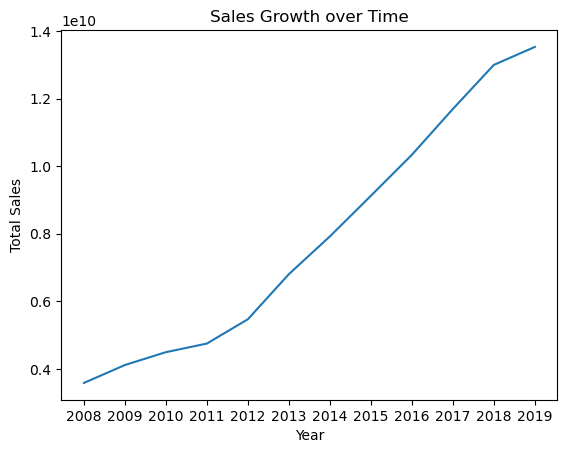

In [407]:
# Get columns
columns = condensed.columns[3:15]

# Calculate the sum of each column
column_sums = condensed[columns].sum()

# Extract the years from the column names
years = [int(col) for col in column_sums.index]

# Extract the total values
totals = column_sums.values

# Create the graph
plt.plot(years, totals)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(years)
plt.title('Sales Growth over Time')
plt.show()

The next plots will give insight on the correlation bewteen the Total Sales from Milestone 2 and Population from Milestone 4. The first will be a scatter plot of the two, followed by a heat map. 

In [340]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib

In [364]:
import seaborn as sns

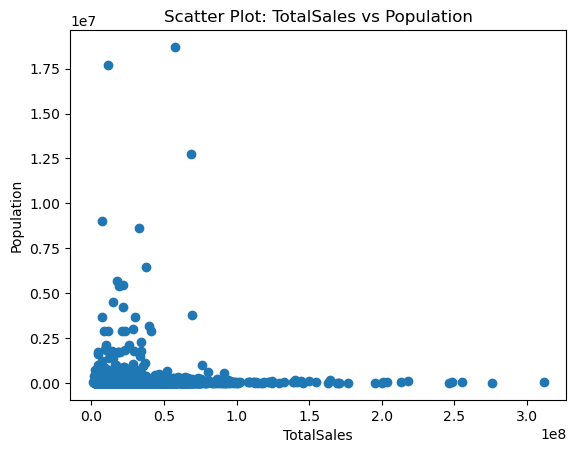

In [400]:
# Create a scatter plot
plt.scatter(condensed['TotalSales'], condensed['Population'])

# Set the labels and title
plt.xlabel('TotalSales')
plt.ylabel('Population')
plt.title('Scatter Plot: TotalSales vs Population')

# Show the plot
plt.show()

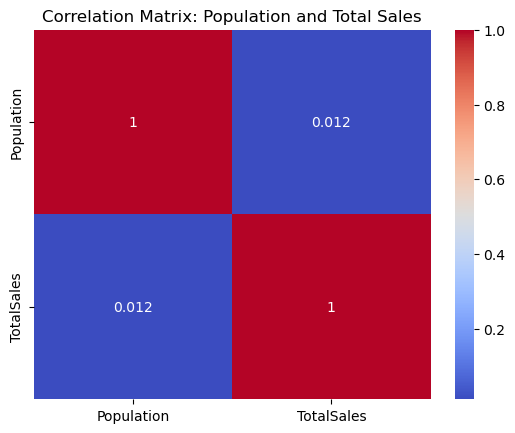

In [406]:
# Select the "population" and "sales" columns
selected_columns = ["Population", "TotalSales"]
selected_df = condensed[selected_columns]

# Create the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Matrix: Population and Total Sales')

# Display the plot
plt.show()

Now that there is an initial understanding of the data, we can continue to add the Wikipedia Data from Milestone 3. To start, the data will be summed and grouped by state to be avoid duplicates. 

In [378]:
# Groups by State and Sums values
condensed_by_state = condensed.groupby('StateName', axis=0, as_index=False).sum()
condensed_by_state.head()

,StateName,Population,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,TotalSales
0,Alabama,3446477,23540500.00,30190100.00,35690200.00,36529000.00,46068100.00,58877400.00,70141500.00,83774700.00,94137100.00,115069200.00,126179700.00,132996500.00,33213700.00,886407700.00
1,Arizona,8456483,82255000.00,84684400.00,79430400.00,73322700.00,77522600.00,98266200.00,112274100.00,121594400.00,142476000.00,163826400.00,180637800.00,189705100.00,41528300.00,1447523400.00
2,Arkansas,1673683,10166100.00,13352700.00,15423600.00,18001500.00,24754700.00,30623200.00,33655900.00,42085100.00,48388200.00,57610900.00,61427300.00,65008500.00,15875900.00,436373600.00
3,California,40029676,1062767100.00,1151730100.00,1270672000.00,1254149500.00,1347562200.00,1646128100.00,1877307500.00,2095765300.00,2305135300.00,2505317200.00,2815191000.00,2848300300.00,608729600.00,22788755200.00
4,Colorado,8343691,78392800.00,98927500.00,109680500.00,131729600.00,156346900.00,179651600.00,213806800.00,253655300.00,295103600.00,339594300.00,377872300.00,394826100.00,98797900.00,2728385200.00


In [418]:
# Creates table of Condensed Data. This table contains sales grouped by State.
condensed_by_state.to_sql('condensed_by_state', conn, if_exists='replace',index=False)

49

With the data condensed, it can be joined to the Wikipedia GDP data and loaded as a table to the database. 

In [423]:
# Creates SQL for Join of condensed_by_state and GDP
sql3 = ("""
    CREATE TABLE condensed_by_state_gdp as
    Select
        *
    From
        condensed_by_state
    Left Join Wiki_Data
    USING (StateName)  
    """)

In [431]:
# Executes SQL (Creates GDP with Sales Table)
cursor.execute(sql3)

In [432]:
# Creates Sales_Pop in Pandas from SQLite Table
FinalCondensed = pd.read_sql_query("""
    Select
        *
    From
        condensed_by_state_gdp
    """, 
                             conn)

In [433]:
FinalCondensed.head()

,StateName,Population,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,TotalSales,GDP_2022,GDP_2023,PerCapitaGDP_2022,PerCapitaGDP_2023
0,Alabama,3446477,23540500.00,30190100.00,35690200.00,36529000.00,46068100.00,58877400.00,70141500.00,83774700.00,94137100.00,115069200.00,126179700.00,132996500.00,33213700.00,886407700.00,277817.00,289038.00,54753.00,56897.00
1,Arizona,8456483,82255000.00,84684400.00,79430400.00,73322700.00,77522600.00,98266200.00,112274100.00,121594400.00,142476000.00,163826400.00,180637800.00,189705100.00,41528300.00,1447523400.00,458950.00,479759.00,62365.00,65096.00
2,Arkansas,1673683,10166100.00,13352700.00,15423600.00,18001500.00,24754700.00,30623200.00,33655900.00,42085100.00,48388200.00,57610900.00,61427300.00,65008500.00,15875900.00,436373600.00,165221.00,171152.00,54259.00,56115.00
3,California,40029676,1062767100.00,1151730100.00,1270672000.00,1254149500.00,1347562200.00,1646128100.00,1877307500.00,2095765300.00,2305135300.00,2505317200.00,2815191000.00,2848300300.00,608729600.00,22788755200.00,3598103.00,3755487.00,92190.00,96222.00
4,Colorado,8343691,78392800.00,98927500.00,109680500.00,131729600.00,156346900.00,179651600.00,213806800.00,253655300.00,295103600.00,339594300.00,377872300.00,394826100.00,98797900.00,2728385200.00,484372.00,502026.00,82954.00,85816.00


With the data created and condensed, we can create more plots. The next two will show the distribution of Population and GDP from 2022 by state.  

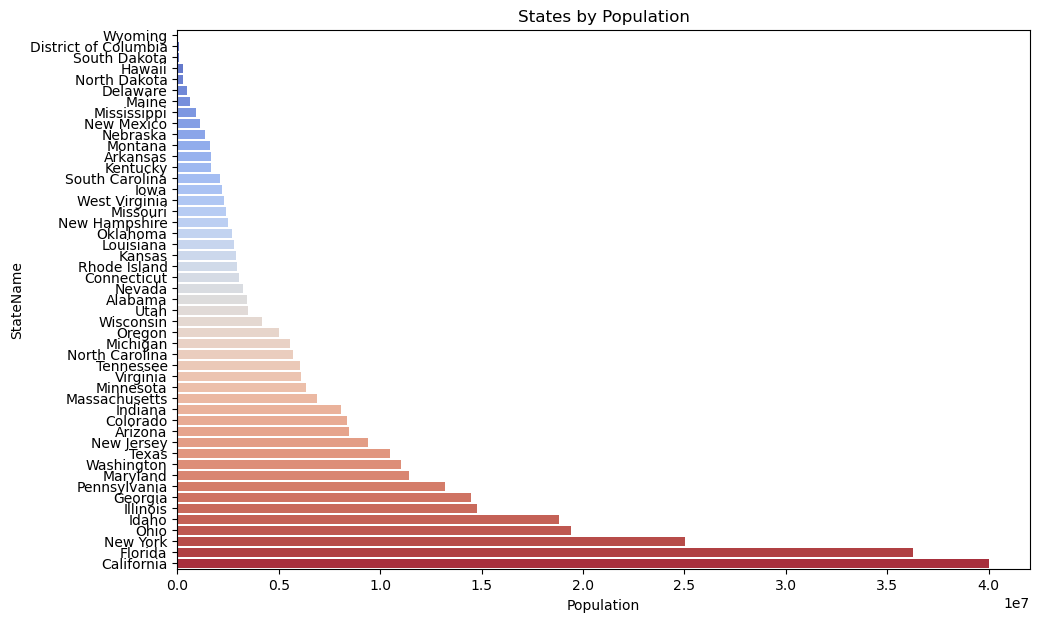

In [410]:
# Sort the dataframe by "GDP_2022" column in ascending order
sorted_df = FinalCondensed.sort_values('Population')

# Set the figure size to adjust the width of the plot
fig, ax = plt.subplots(figsize=(11, 7))

# Create the diverging bar plot
sns.barplot(x='Population', y='StateName', data=sorted_df, palette='coolwarm')

# Set the title of the plot
plt.title('States by Population')

# Display the plot
plt.show()

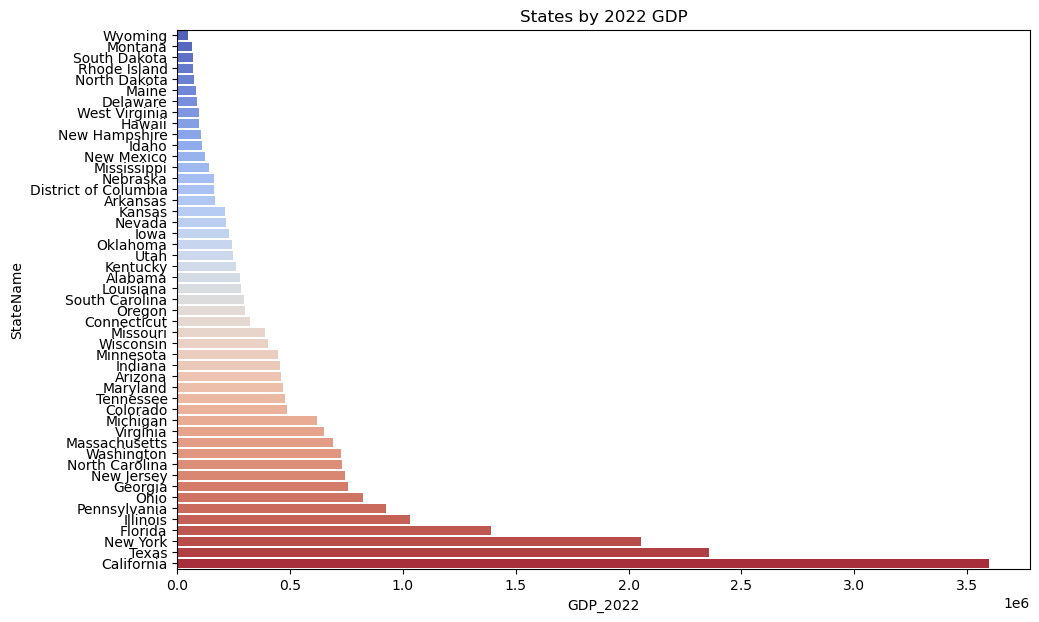

In [393]:
# Sort the dataframe by "GDP_2022" column in ascending order
sorted_df = FinalCondensed.sort_values('GDP_2022')

# Set the figure size to adjust the width of the plot
fig, ax = plt.subplots(figsize=(11, 7))

# Create the diverging bar plot
sns.barplot(x='GDP_2022', y='StateName', data=sorted_df, palette='coolwarm')

# Set the title of the plot
plt.title('States by 2022 GDP')

# Display the plot
plt.show()


The following plot is a scatter plot of Total Sales from Milestone 2 and GDP 2022 from Milestone 3. This will give a view of the correlation between the two variables. 

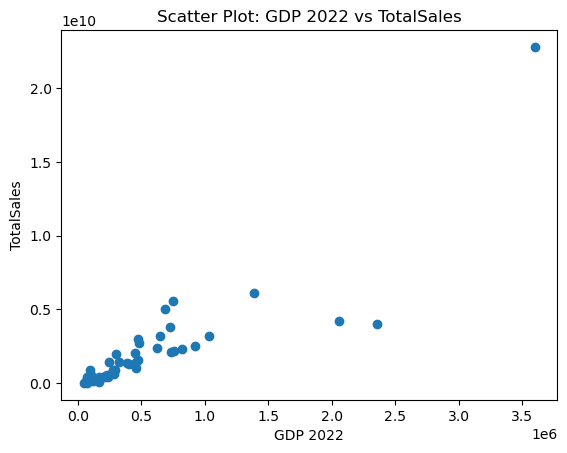

In [399]:
# Create a scatter plot
plt.scatter(FinalCondensed['GDP_2022'], FinalCondensed['TotalSales'])

# Set the labels and title
plt.xlabel('GDP 2022')
plt.ylabel('TotalSales')
plt.title('Scatter Plot: GDP 2022 vs TotalSales')

# Show the plot
plt.show()

The last two will be heat maps of GDP 2022 from Milestone 3 and Total Sales from Milestone 2, and the following will be GDP 2022 from Milestone 3 and Population from Milestone 4.

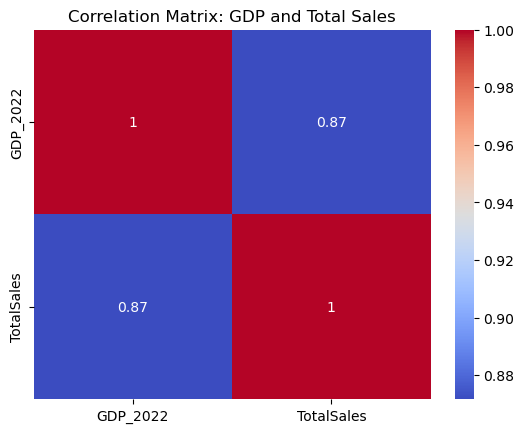

In [405]:
# Select the "GDP_2022" and "TotalSales" columns
selected_columns = ["GDP_2022", "TotalSales"]
selected_df = FinalCondensed[selected_columns]

# Create the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Matrix: GDP and Total Sales')

# Display the plot
plt.show()

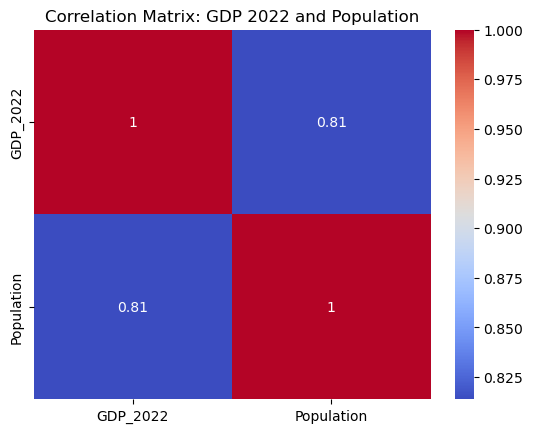

In [404]:
# Select the "GDP_2022" and "Population" columns
selected_columns = ["GDP_2022", "Population"]
selected_df = FinalCondensed[selected_columns]

# Create the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Matrix: GDP 2022 and Population')

# Display the plot
plt.show()

This project involved exploring GDP Data in the United States, House Price Data, and Population Data. Using this data, an analysis was conducted on the relationship between the three and can be looked at by city and state. 

This project was created with three data sets and provided some insights on Population, Home Sales, and GDP. The plots that were created explain some of the trends of the data. For example, “Scatter Plot: Total Sales vs Population” shows that there is no clear trend between those two variables. The heatmap that follows, “Correlation Matrix: Population and Total Sales”, confirms this. However, in the Scatter Plot “GDP 2022 vs Total Sales”, a positive trend is seen. When GDP increases, Total Sales increases as well. The heat map “Correlation Matrix: GDP and Total Sales” displays a much higher correlation between the two than Total Sales and Population. Among the plots created, it is clearer that GDP has a bigger effect on Total Sales, however, Population and GDP are correlated as well since most states with high populations have high GDP. This can be seen in the Diverging Bar Plots “States by Population” and “States by GDP”. 

This project involved new concepts that I had not explored before, such as reading Website data and APIs. These two were the most challenging. Some of the transformations conducted such as reading the populations from the API and creating a data frame, involved longer functions that needed to access the correct subset in the JSON as well as take into the time in between each request. Reading the website data created some challenges since the data was in a multilevel index, and an index needed to be removed from the data we needed. 

Gathering data created some ethical implications, one being the credibility of the sites where the data is being used from. Most sets are verified; however, a validation of data quality would be beneficial in this project. Another ethical implication is the timing of the different data sources. Population is displayed as a total, however, if population could be displayed over time, this could give more insight to the relationships in the data. This is the same for GDP. GDP is only included for 2022 and 2023 where the sales data has from 2008-2020. 

Overall, this project helped with the understanding of GDP Data in the United States, House Price Data, and Population Data. Although there are some ethical implications, this topic can continue to be explored in the future with more data and resources. 

